# Installer les bibliothèques nécessaires (à exécuter une seule fois)

In [1]:
!pip install pandas openpyxl matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importer les bibliothèques

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier Excel

In [3]:
file_path = 'resultatDuJeu.xlsx'  # Assure-toi que le fichier est dans le même répertoire que ton Notebook
df = pd.read_excel(file_path)

# Afficher les premières lignes pour vérifier que les données ont bien été chargées
df.head()

,Date,Joueur,Sex,Score,GoodHit,PerfectHit,Précision
0,2024-11-18 11:00:34,Ryu,M,160,50,55,96.330275
1,2024-11-18 11:03:00,Ryu,M,37,15,11,72.222222
2,2024-11-18 11:05:09,Luigi\n\n\n\n\n\n,M,12,10,1,57.894737
3,2024-11-18 11:07:40,Luigi\n\n\n\n\n\n,M,163,11,76,89.690722
4,2024-11-18 10:04:32,Emilie,F,45,9,18,72.972973


# Séparer les données par sexe

## Pour notre 1er graphique, l'idée est de voir si les scores réalisés par les personnages féminins et masculins sont différents ou non (PS : je ne suis pas mysogine je cherche seulement des stats à comparer)

In [4]:
df_filles = df[df['Sex'] == 'F']
df_garcons = df[df['Sex'] == 'M']

# Vérification des données filtrées
print("Scores des filles :")
print(df_filles[['Joueur', 'Score']])
print("\nScores des garçons :")
print(df_garcons[['Joueur', 'Score']])

Scores des filles :
      Joueur  Score
4     Emilie     45
5     Emilie    123
6  Fleuriane     35
7  Fleuriane    101
8      daria    174
9      daria     73

Scores des garçons :
               Joueur  Score
0                 Ryu    160
1                 Ryu     37
2   Luigi\n\n\n\n\n\n     12
3   Luigi\n\n\n\n\n\n    163
10               Enzo     14
11               Enzo     35


# Afficher le graphique avec le score des filles en rouge et ceux des garçons en bleu

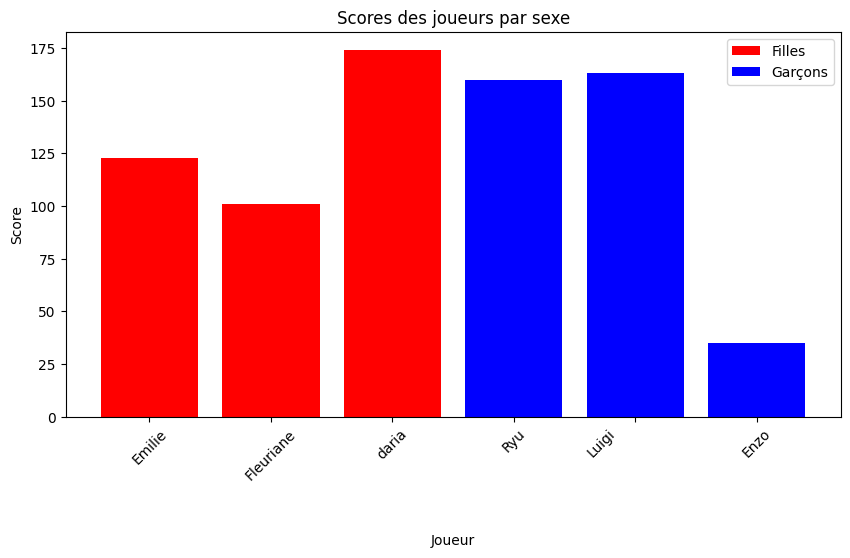

In [5]:
plt.figure(figsize=(10, 5))

# Graphique pour les filles (rouge) et les garçons (bleu)
plt.bar(df_filles['Joueur'], df_filles['Score'], color='red', label="Filles")
plt.bar(df_garcons['Joueur'], df_garcons['Score'], color='blue', label="Garçons")

# Ajouter les titres et les étiquettes
plt.xlabel('Joueur')
plt.ylabel('Score')
plt.title('Scores des joueurs par sexe')
plt.legend()

# Rotation des noms de joueurs pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

## pour la suite on va faire deux histogrammes qui vont prendre respectivement le meilleur score par joueur et la meilleur précision par joueur 

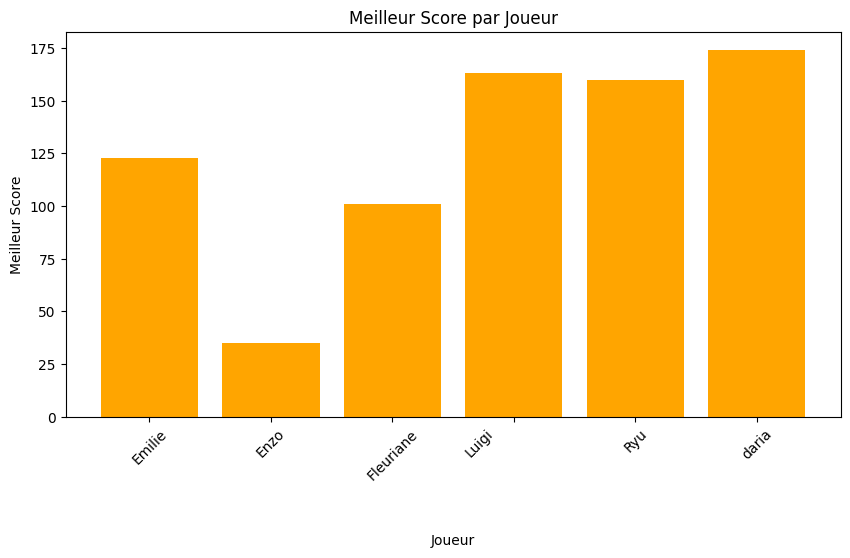

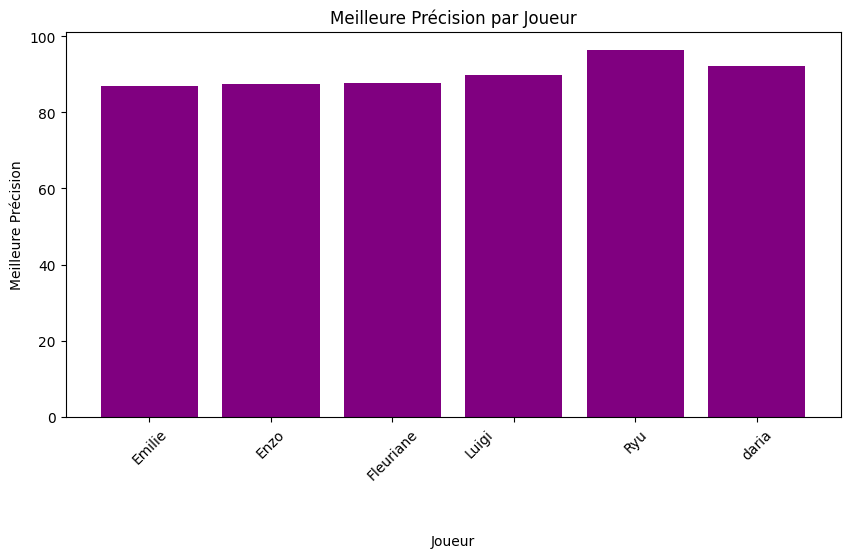

In [6]:
best_scores = df.groupby('Joueur')['Score'].max()
plt.figure(figsize=(10, 5))
plt.bar(best_scores.index, best_scores.values, color='orange')
plt.xlabel('Joueur')
plt.ylabel('Meilleur Score')
plt.title('Meilleur Score par Joueur')
plt.xticks(rotation=45)
plt.show()


best_precision = df.groupby('Joueur')['Précision'].max()
plt.figure(figsize=(10, 5))
plt.bar(best_precision.index, best_precision.values, color='purple')
plt.xlabel('Joueur')
plt.ylabel('Meilleure Précision')
plt.title('Meilleure Précision par Joueur')
plt.xticks(rotation=45)
plt.show()

## Le troisième graphique compare les scores de la première partie et de la deuxième partie pour voir s'il y a eu une amélioration ou au contraire une dégradation dû à une perte de concentration entre les deux. 


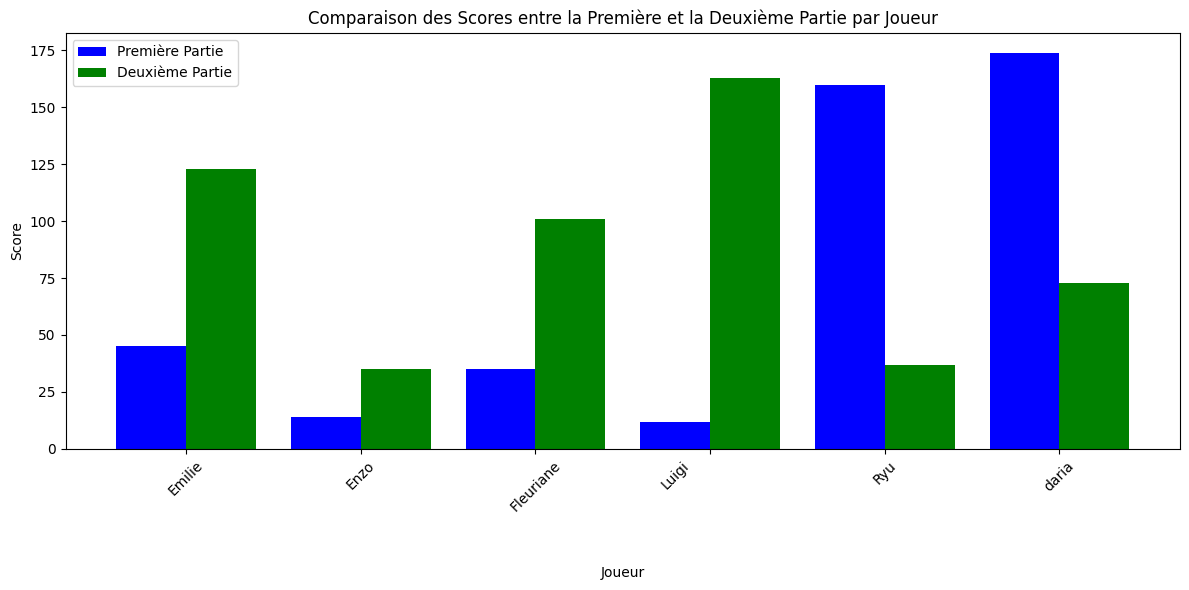

In [7]:
# Convertir la colonne 'Date' en type datetime
df['Date'] = pd.to_datetime(df['Date'])

# Trier les données par joueur et par date
df_sorted = df.sort_values(by=['Joueur', 'Date'])

# Créer des listes pour stocker les scores de la première et de la deuxième partie
players = []
first_game_scores = []
second_game_scores = []

# Grouper les données par joueur
for player, group in df_sorted.groupby('Joueur'):
    if len(group) >= 2:  # Assurez-vous que chaque joueur a bien joué deux parties
        first_game = group.iloc[0]
        second_game = group.iloc[1]
        players.append(player)
        first_game_scores.append(first_game['Score'])
        second_game_scores.append(second_game['Score'])

# Créer un graphique comparatif
plt.figure(figsize=(12, 6))

bar_width = 0.4
x = range(len(players))

# Tracer les scores de la première partie en bleu
plt.bar(x, first_game_scores, width=bar_width, color='blue', label='Première Partie')

# Tracer les scores de la deuxième partie en vert, légèrement décalé à droite
plt.bar([i + bar_width for i in x], second_game_scores, width=bar_width, color='green', label='Deuxième Partie')

# Ajouter des labels et des légendes
plt.xlabel('Joueur')
plt.ylabel('Score')
plt.title('Comparaison des Scores entre la Première et la Deuxième Partie par Joueur')
plt.xticks([i + bar_width / 2 for i in x], players, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()